<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librerias" data-toc-modified-id="Librerias-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librerias</a></span></li><li><span><a href="#Extracción-letras-canciones" data-toc-modified-id="Extracción-letras-canciones-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extracción letras canciones</a></span></li><li><span><a href="#Tokenizacion" data-toc-modified-id="Tokenizacion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tokenizacion</a></span></li><li><span><a href="#Traduccion-de-la-letra" data-toc-modified-id="Traduccion-de-la-letra-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Traduccion de la letra</a></span></li><li><span><a href="#Stop-words" data-toc-modified-id="Stop-words-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stop words</a></span></li><li><span><a href="#Análisis-de-sentimiento" data-toc-modified-id="Análisis-de-sentimiento-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Análisis de sentimiento</a></span></li></ul></div>

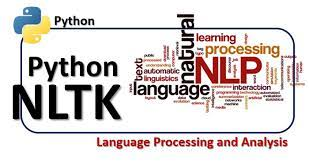

El procesamiento del lenguaje natural (NLP, por sus siglas en inglés) es una rama de la inteligencia artificial que ayuda a las computadoras a entender, interpretar y manipular el lenguaje humano. NLP toma elementos prestados de muchas disciplinas, incluyendo la ciencia de la computación y la lingüística computacional, en su afán por cerrar la brecha entre la comunicación humana y el entendimiento de las computadoras.

Estas aplicaciones incluyen chatbots, traducción de idiomas, clasificación de texto, resumen de párrafos, filtrado de spam y muchas más. Hay algunas bibliotecas NLP de código abierto que hacen el trabajo de procesar texto, como NLTK, Stanford NLP suite, Apache Open NLP, etc. NLTK es la biblioteca más popular y fácil de entender.

El kit de herramientas de lenguaje natural NLTK es un conjunto de bibliotecas y programas de codigo abierto para el procesamiento del lenguaje natural. 

# Librerias 

In [1]:
import pandas as pd
import numpy as np
import unidecode
import ast
import re
import seaborn as sns
# Para extraer las canciones
#########################################
from bs4 import BeautifulSoup
import requests

#NLTK, para análisis de sentimientos
#########################################
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#TextBlob
from textblob import TextBlob

#SpaCy
import spacy
from spacy import displacy

from langdetect import detect


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
#!pip install langdetect
#!pip install unidecode

In [3]:
df = pd.read_csv("Data/final_spotify.csv", index_col = 0)
df.head()

,song,artist,date,explicit,uri,popularity,ironhacker,links,danceability,energy,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,51,Ana,https://open.spotify.com/track/1SayqEg8HKK2IeI...,0.720,0.595,...,0.000047,0.0775,0.486,111.000,audio_features,1SayqEg8HKK2IeIEWjdYxY,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4
1,The Pond,Cava Grande,2021-01-29,False,spotify:track:0IyuvVFF4mXGi9viEqaEsI,34,Ana,https://open.spotify.com/track/0IyuvVFF4mXGi9v...,0.714,0.618,...,0.865000,0.1350,0.549,121.984,audio_features,0IyuvVFF4mXGi9viEqaEsI,https://api.spotify.com/v1/tracks/0IyuvVFF4mXG...,https://api.spotify.com/v1/audio-analysis/0Iyu...,321639,4
2,Any Way You Want It,Journey,1980,False,spotify:track:71SvEDmsOwIWw1IozsZoMA,71,JeanCha,https://open.spotify.com/track/71SvEDmsOwIWw1I...,0.529,0.932,...,0.001090,0.1360,0.571,138.158,audio_features,71SvEDmsOwIWw1IozsZoMA,https://api.spotify.com/v1/tracks/71SvEDmsOwIW...,https://api.spotify.com/v1/audio-analysis/71Sv...,201693,4
3,No Diggity,"['Blackstreet', 'Dr. Dre', 'Queen Pen']",1996-09-09,False,spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ,75,Edu,https://open.spotify.com/track/6MdqqkQ8sSC0WB4...,0.867,0.646,...,0.000000,0.2790,0.670,88.634,audio_features,6MdqqkQ8sSC0WB4i8PyRuQ,https://api.spotify.com/v1/tracks/6MdqqkQ8sSC0...,https://api.spotify.com/v1/audio-analysis/6Mdq...,304600,4
4,Lost on You,LP,2017-05-05,False,spotify:track:2LIh4uzqq9cXMPzzmcToHl,74,Antonio,https://open.spotify.com/track/2LIh4uzqq9cXMPz...,0.433,0.724,...,0.000000,0.0918,0.689,174.006,audio_features,2LIh4uzqq9cXMPzzmcToHl,https://api.spotify.com/v1/tracks/2LIh4uzqq9cX...,https://api.spotify.com/v1/audio-analysis/2LIh...,268105,4


# Extracción letras canciones

Para poder obtener la letra de las canciones para su posterior analisis usaremos `BeautifulSoup`. Si no recordais su uso podeis pasaros por [aquí](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-8/8.1-Web%20scraping.ipynb). 

 


In [4]:
def sacar_artista(artista):   
    try:
        return ast.literal_eval(artista)[0]
    except:
        return artista

In [5]:
df["artist2"] = df.artist.apply(sacar_artista)

Antes de nada debemos hacer un trabajo de depuracion para poder generar las distintas url para hacer `requests`.  

In [6]:
df["artist2"].replace("&", "and", regex=True,  inplace = True)

df["song"] = df["song"].apply(lambda x: x.strip())

#df["song"].replace("\(.*\)", "", regex=True,  inplace = True)
df["song"].replace("!|'|:|,|\(.*\)|\.", "", regex=True,  inplace = True)
df["artist2"].replace("!|'|:|,|\(.*\)|\.", "", regex=True,  inplace = True)


df["song"] = df["song"].str.split("-").str[0]

df["song"] = df["song"].apply(unidecode.unidecode)
df["artist2"] = df["artist2"].apply(unidecode.unidecode)

In [7]:
def sacar_letras(artista, cancion):
    lyrics = "" 

    artista = str(artista.replace(' ','-')) if ' ' in artista else str(artista)
    cancion = str(cancion.replace(' ','-')) if ' ' in cancion else str(cancion)


    url = 'https://genius.com/'+ artista + '-' + cancion + '-' + 'lyrics'
    page = requests.get(url)

  
    if page.status_code == 200:
        html = BeautifulSoup(page.content, 'html.parser')
        lyrics1 = html.find_all("div", class_="lyrics")
        lyrics2 = html.find_all("div",  {"class": "Lyrics__Container-sc-1ynbvzw-6 jYfhrf"} )


        if lyrics1:
            lyrics += lyrics1.get_text()
            
        elif lyrics2:
            lyrics += lyrics2[0].get_text()
        elif lyrics1 == lyrics2 == None:
            lyrics = np.nan
        return lyrics
    else:
        return np.nan



In [8]:
df["letras"] = df.apply(lambda x: sacar_letras(x.artist2, x.song), axis = 1)

In [9]:
df.sample(1)

,song,artist,date,explicit,uri,popularity,ironhacker,links,danceability,energy,...,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,artist2,letras
60,Autumn Op8 No3 Major Allegro,"['Baroque Festival Orchestra', 'Alberto Lizzio']",1994-07-01,False,spotify:track:7d20u6lKFtjLVNW9nhJAsL,40,Miguel,https://open.spotify.com/track/7d20u6lKFtjLVNW...,0.532,0.028,...,0.221,103.69,audio_features,7d20u6lKFtjLVNW9nhJAsL,https://api.spotify.com/v1/tracks/7d20u6lKFtjL...,https://api.spotify.com/v1/audio-analysis/7d20...,306933,4,Baroque Festival Orchestra,NaN


In [10]:
df.dropna(subset = ["letras"], inplace = True)

In [11]:
df1 = df.copy()

In [12]:
df1["letras"].replace("\[.*?\]", "", regex=True,  inplace = True)

In [13]:
def separar (x):
    try:
        res_list = []
        res_list = re.findall('[A-Z][^A-Z]*', x)
        return " ".join(res_list)
    except:
        return np.nan


In [14]:
df1["letras2"] = df1["letras"].apply(separar)

In [15]:
df1.head(2)

,song,artist,date,explicit,uri,popularity,ironhacker,links,danceability,energy,...,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,artist2,letras,letras2
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,51,Ana,https://open.spotify.com/track/1SayqEg8HKK2IeI...,0.720,0.595,...,111.000,audio_features,1SayqEg8HKK2IeIEWjdYxY,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4,C2C,"Oh, oh, ohWoah woah woahMhmHave no place to go...","Oh, oh, oh Woah woah woah Mhm Have no place to..."
2,Any Way You Want It,Journey,1980,False,spotify:track:71SvEDmsOwIWw1IozsZoMA,71,JeanCha,https://open.spotify.com/track/71SvEDmsOwIWw1I...,0.529,0.932,...,138.158,audio_features,71SvEDmsOwIWw1IozsZoMA,https://api.spotify.com/v1/tracks/71SvEDmsOwIW...,https://api.spotify.com/v1/audio-analysis/71Sv...,201693,4,Journey,Any way you want itThat's the way you need itA...,Any way you want it That's the way you need it...


# Tokenizacion


Mediante la tokenizacion podremos dividir un texto en partes pequeñas. Podemos convertir párrafos en oraciones y oraciones en palabras. Por tanto, es el proceso de convertir las cadenas de texto normales en una lista de tokens (palabras que realmente queremos).

In [100]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(df1.iloc[2]['letras2'])
tokens[:10]

['Yeah',
 'You',
 'know',
 'what',
 'I',
 'like',
 'the',
 'playettes',
 'No',
 'diggity']

In [17]:
def tokenize (string):
    try:
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(string)
        return tokens
    except:
        return np.nan

In [18]:
df1['letras_tok'] = df1['letras2'].apply(tokenize)
df1.head(2)

,song,artist,date,explicit,uri,popularity,ironhacker,links,danceability,energy,...,type,id,track_href,analysis_url,duration_ms,time_signature,artist2,letras,letras2,letras_tok
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,51,Ana,https://open.spotify.com/track/1SayqEg8HKK2IeI...,0.720,0.595,...,audio_features,1SayqEg8HKK2IeIEWjdYxY,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4,C2C,"Oh, oh, ohWoah woah woahMhmHave no place to go...","Oh, oh, oh Woah woah woah Mhm Have no place to...","[Oh, oh, oh, Woah, woah, woah, Mhm, Have, no, ..."
2,Any Way You Want It,Journey,1980,False,spotify:track:71SvEDmsOwIWw1IozsZoMA,71,JeanCha,https://open.spotify.com/track/71SvEDmsOwIWw1I...,0.529,0.932,...,audio_features,71SvEDmsOwIWw1IozsZoMA,https://api.spotify.com/v1/tracks/71SvEDmsOwIW...,https://api.spotify.com/v1/audio-analysis/71Sv...,201693,4,Journey,Any way you want itThat's the way you need itA...,Any way you want it That's the way you need it...,"[Any, way, you, want, it, That, s, the, way, y..."


In [19]:
df1['letras_tok'] = df1['letras_tok'].apply(lambda x: " ".join(x))
df1.head(2)

,song,artist,date,explicit,uri,popularity,ironhacker,links,danceability,energy,...,type,id,track_href,analysis_url,duration_ms,time_signature,artist2,letras,letras2,letras_tok
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,51,Ana,https://open.spotify.com/track/1SayqEg8HKK2IeI...,0.720,0.595,...,audio_features,1SayqEg8HKK2IeIEWjdYxY,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4,C2C,"Oh, oh, ohWoah woah woahMhmHave no place to go...","Oh, oh, oh Woah woah woah Mhm Have no place to...",Oh oh oh Woah woah woah Mhm Have no place to g...
2,Any Way You Want It,Journey,1980,False,spotify:track:71SvEDmsOwIWw1IozsZoMA,71,JeanCha,https://open.spotify.com/track/71SvEDmsOwIWw1I...,0.529,0.932,...,audio_features,71SvEDmsOwIWw1IozsZoMA,https://api.spotify.com/v1/tracks/71SvEDmsOwIW...,https://api.spotify.com/v1/audio-analysis/71Sv...,201693,4,Journey,Any way you want itThat's the way you need itA...,Any way you want it That's the way you need it...,Any way you want it That s the way you need it...


# Traduccion de la letra 

Desafortunadamente las librerias de analisis de sentimiento no son especialmente precisas cuando se trata del Español. Es por ello que antes de hacer cualquier analisis de sentimientyo en este idioma antes de nada deberemos hacer una traduccion de texto. 

In [20]:
#Translating
spanish_string = TextBlob(u'que tengas buen buen day')
english_blob=spanish_string.translate(from_lang='es',to='en')
english_blob

TextBlob("have good day")

In [21]:
def intoEnglish(string):
    spanish_string = TextBlob(string)
    try:
        english_blob=spanish_string.translate(from_lang='es',to='en')
        return "".join(list(english_blob))
    except:
        return string

In [22]:
df1['letras_tok'] = df1["letras_tok"].apply(intoEnglish)


# Stop words

Las stop words o palabras vacias son palabras de uso comun (como "el", "un", "en") de esta manera el procesamiento de nuestro texto sera mas eficiente al eliminar palabras que no contribuyan a la interpretacion del mismo. 

Si deseas conocerlas puedes hacerlo con el siguiente codigo:
```python
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))
```


In [23]:
nltk.download('stopwords') #stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anagarciagarcia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [25]:
df1["letras_tok2"] = df1["letras_tok"].apply(lambda x: x.split(" "))



In [26]:
df1.head(2)

,song,artist,date,explicit,uri,popularity,ironhacker,links,danceability,energy,...,id,track_href,analysis_url,duration_ms,time_signature,artist2,letras,letras2,letras_tok,letras_tok2
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,51,Ana,https://open.spotify.com/track/1SayqEg8HKK2IeI...,0.720,0.595,...,1SayqEg8HKK2IeIEWjdYxY,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4,C2C,"Oh, oh, ohWoah woah woahMhmHave no place to go...","Oh, oh, oh Woah woah woah Mhm Have no place to...",Oh oh oh woah woah woah mhm has not pleas to g...,"[Oh, oh, oh, woah, woah, woah, mhm, has, not, ..."
2,Any Way You Want It,Journey,1980,False,spotify:track:71SvEDmsOwIWw1IozsZoMA,71,JeanCha,https://open.spotify.com/track/71SvEDmsOwIWw1I...,0.529,0.932,...,71SvEDmsOwIWw1IozsZoMA,https://api.spotify.com/v1/tracks/71SvEDmsOwIW...,https://api.spotify.com/v1/audio-analysis/71Sv...,201693,4,Journey,Any way you want itThat's the way you need itA...,Any way you want it That's the way you need it...,Any Way You Want It That S The Way You Need It...,"[Any, Way, You, Want, It, That, S, The, Way, Y..."


In [27]:
def stop_words (lista):
    stop_words = stopwords.words('english')
    nueva_lista = []
    for string in lista:
        if string.lower() not in stop_words:
            nueva_lista.append(string)
    return " ".join(nueva_lista)
    

In [28]:
df1["letras_tok2"] = df1["letras_tok2"].apply(stop_words)

In [29]:
df1.head(2)

,song,artist,date,explicit,uri,popularity,ironhacker,links,danceability,energy,...,id,track_href,analysis_url,duration_ms,time_signature,artist2,letras,letras2,letras_tok,letras_tok2
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,51,Ana,https://open.spotify.com/track/1SayqEg8HKK2IeI...,0.720,0.595,...,1SayqEg8HKK2IeIEWjdYxY,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4,C2C,"Oh, oh, ohWoah woah woahMhmHave no place to go...","Oh, oh, oh Woah woah woah Mhm Have no place to...",Oh oh oh woah woah woah mhm has not pleas to g...,Oh oh oh woah woah woah mhm pleas go pleasant ...
2,Any Way You Want It,Journey,1980,False,spotify:track:71SvEDmsOwIWw1IozsZoMA,71,JeanCha,https://open.spotify.com/track/71SvEDmsOwIWw1I...,0.529,0.932,...,71SvEDmsOwIWw1IozsZoMA,https://api.spotify.com/v1/tracks/71SvEDmsOwIW...,https://api.spotify.com/v1/audio-analysis/71Sv...,201693,4,Journey,Any way you want itThat's the way you need itA...,Any way you want it That's the way you need it...,Any Way You Want It That S The Way You Need It...,Way Want Way Need Way Want Loves Laugh Loves S...


# Análisis de sentimiento

In [30]:
#Descargamos el tokenizador
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anagarciagarcia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
# iniciamos el objeto
sia = SentimentIntensityAnalyzer()


In [32]:
sentence = "this is beautiful"
polarity = sia.polarity_scores(sentence)
polarity

{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

In [33]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [34]:
sentimentAnalysis(sentence)


0.5994

In [35]:
df1['sentiment_compound'] = df1["letras_tok2"].apply(sentimentAnalysis)
df1.head(1)

,song,artist,date,explicit,uri,popularity,ironhacker,links,danceability,energy,...,track_href,analysis_url,duration_ms,time_signature,artist2,letras,letras2,letras_tok,letras_tok2,sentiment_compound
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,51,Ana,https://open.spotify.com/track/1SayqEg8HKK2IeI...,0.72,0.595,...,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4,C2C,"Oh, oh, ohWoah woah woahMhmHave no place to go...","Oh, oh, oh Woah woah woah Mhm Have no place to...",Oh oh oh woah woah woah mhm has not pleas to g...,Oh oh oh woah woah woah mhm pleas go pleasant ...,0.9892


In [36]:
results = df1.groupby('ironhacker')["sentiment_compound"].mean().reset_index()
results

,ironhacker,sentiment_compound
0,Ana,0.370625
1,Antonio,0.246140
2,Edu,0.324456
3,Fer,0.479622
4,JeanCha,0.959400
5,Miguel,0.397147
6,Pablo,-0.106075
7,Rodri,0.276778


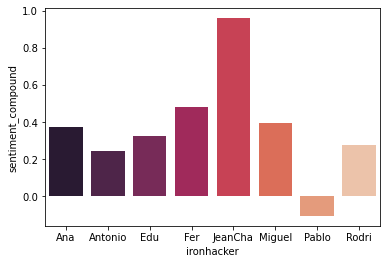

In [37]:
sns.barplot(x = "ironhacker", y = "sentiment_compound", data = results, palette="rocket")